In [14]:
%load_ext autoreload
%autoreload 2

import glob
import os

import matplotlib.pyplot as plt
import model as m
import numpy as np
import torchvision.transforms as transforms
from data import get_skinlesion, standardize_skinlesion_inv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = get_skinlesion(
    batch_size=4, num_workers=4, data_augmentation=True)

In [16]:
len(train_dataset), len(val_dataset), len(test_dataset)

(160, 20, 20)

In [17]:
# # This should be run where trainset is not standardized.
im, label = train_dataset[0]
channel_mean_sum = im.mean((1, 2))
channel_std_sum = im.std((1, 2))
for i in range(1, len(train_dataset)):
    im, label = train_dataset[i]
    channel_mean_sum += im.mean((1, 2))
    channel_std_sum += im.std((1, 2))

channel_mean = channel_mean_sum / len(train_dataset)
channel_std = channel_std_sum / len(train_dataset)
channel_mean, channel_std

(tensor([-0.5088, -0.4184, -0.3741]), tensor([1.6475, 1.4282, 1.3182]))

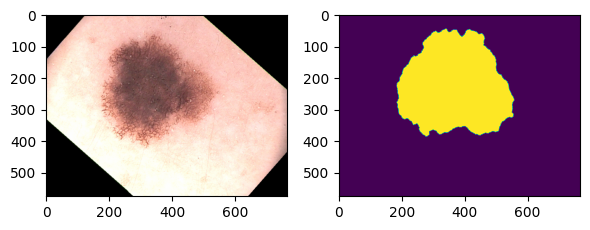

In [18]:
im, label = train_dataset[0]
im = standardize_skinlesion_inv(im)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True)
ax0.imshow(np.moveaxis(im.numpy(), 0, 2))
ax1.imshow(label.numpy()[0]);

Indices for the test dataset wrt. original dataset: 
 [3, 30, 130, 45, 167, 158, 76, 128, 170, 136, 44, 64, 2, 13, 121, 111, 193, 101, 187, 66]


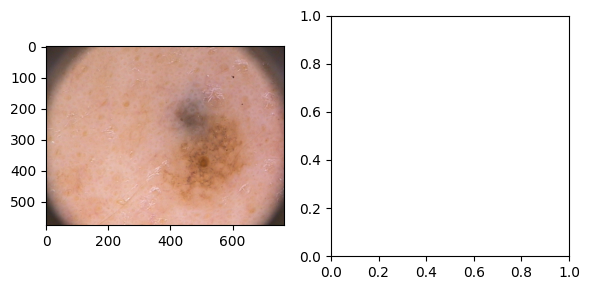

In [22]:
import random
random.seed(42)
random_idxs = random.sample(range(200), 200)
im, _ = test_dataset[0]
print(f"Indices for the test dataset wrt. original dataset: \n {random_idxs[180:200]}")
im = standardize_skinlesion_inv(im)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True)
ax0.imshow(np.moveaxis(im.numpy(), 0, 2))


In [2]:
#for i in range(len(train_dataset)):
#    im, label = train_dataset[i]
#    resized_im = transforms.Resize(size=(576,767))(im)
#    print(resized_im.shape)